# Loan_prediction 

### Importing important libraries and module 

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Reading train and test data 

In [247]:
df_train = pd.read_csv('train_loan.csv')
df_test = pd.read_csv('test_loan.csv')

## Data Insight 

In [248]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [249]:
df_train.shape

(614, 13)

In [250]:
df_test.shape

(367, 12)

In [251]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [252]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [253]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Graphically Analysing each variable i.e. called univariate Analysis

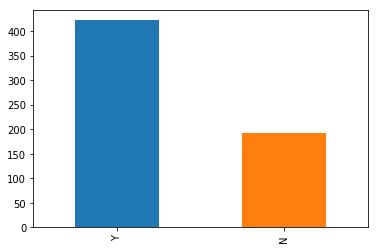

In [254]:
#target_variable
df_train['Loan_Status'].value_counts().plot.bar()

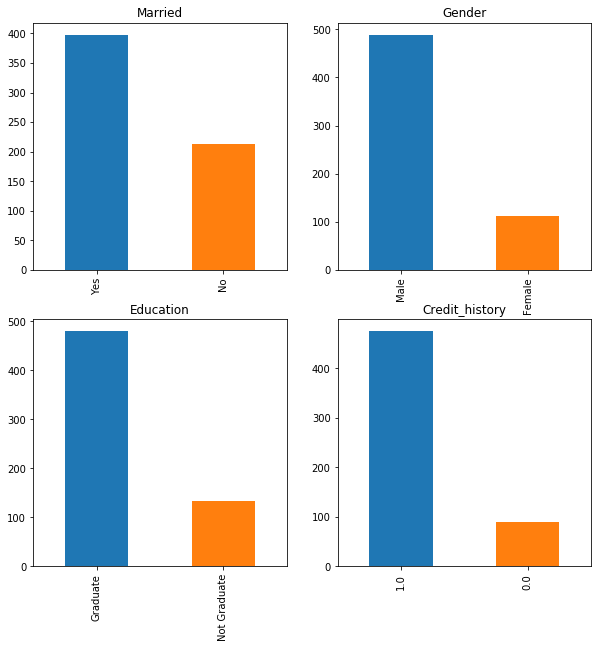

In [255]:
plt.figure(1)
plt.subplot(221)
df_train['Married'].value_counts().plot.bar(figsize=(10,10), title='Married')
plt.subplot(222)
df_train['Gender'].value_counts().plot.bar(title='Gender')
plt.subplot(223)
df_train['Education'].value_counts().plot.bar(title='Education')
plt.subplot(224)
df_train['Credit_History'].value_counts().plot.bar(title='Credit_history')
plt.show()

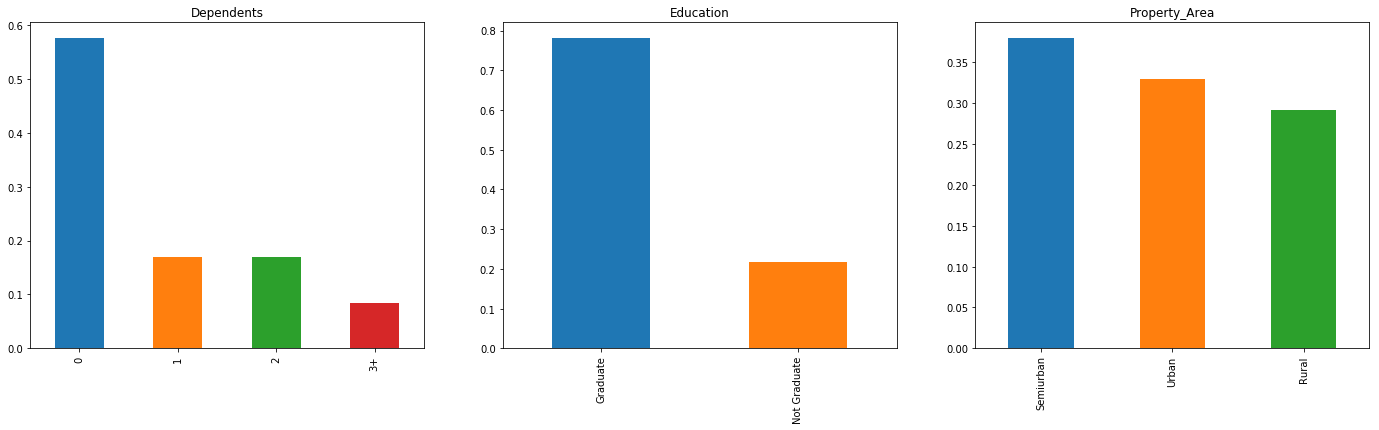

In [256]:
plt.figure
plt.subplot(131)
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
df_train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

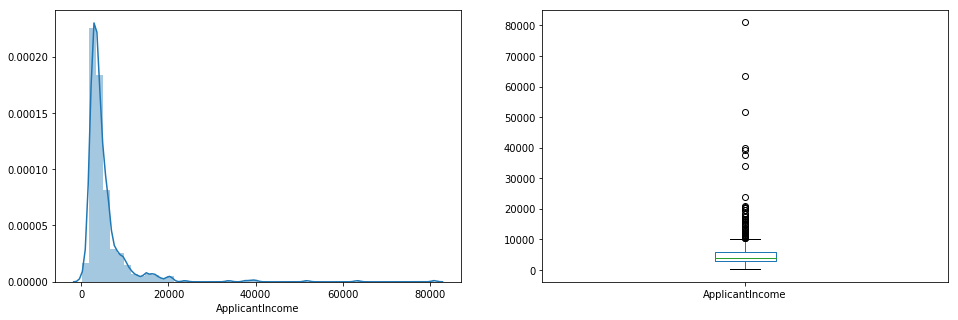

In [257]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train['ApplicantIncome'])
plt.subplot(122)
df_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [258]:
#corr = df_train['ApplicantIncome', 'Education'].corr()
#orr

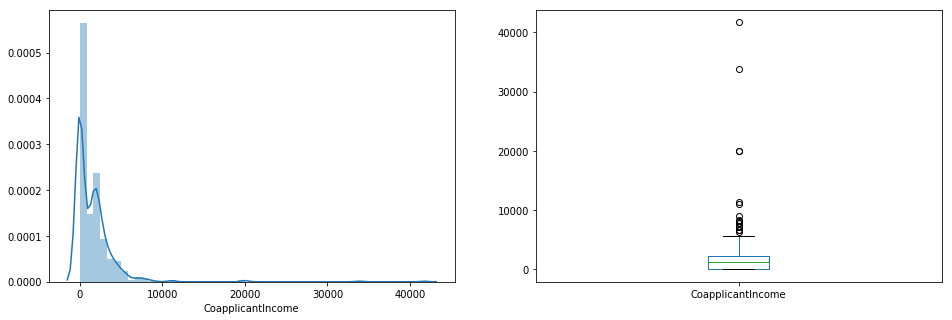

In [259]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train['CoapplicantIncome'])
plt.subplot(122)
df_train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

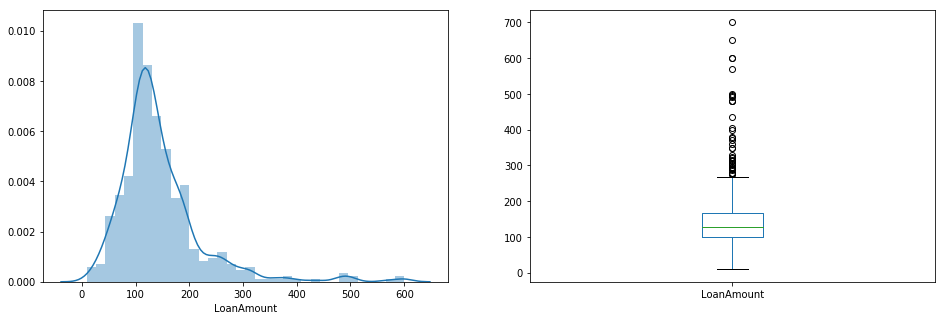

In [260]:
plt.figure(1)
plt.subplot(121)
df=df_train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df_train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

### Corelation matrix 

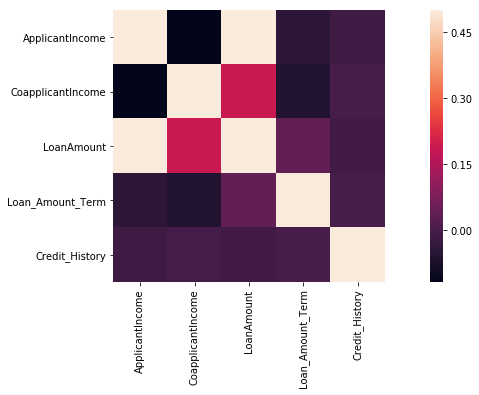

In [261]:
corr = df_train.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr, square=True, vmax=.5)

In [262]:
train = df_train
test = df_test

## Feature Engg.

In [263]:
def get_combined_data():
    target = train.Loan_Status
    train.drop(['Loan_Status'], 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['Loan_ID', 'index'], axis = 1, inplace=True)
    return combined

In [264]:
combined  = get_combined_data()

In [265]:
combined.shape

(981, 11)

In [266]:
combined.Gender.mode()

0    Male
dtype: object

In [267]:
combined.Gender.fillna('Male', inplace = True)

In [268]:
combined.Married.mode()

0    Yes
dtype: object

In [269]:
combined.Gender.fillna('Yes', inplace=True)

In [270]:
combined.Dependents.mode()

0    0
dtype: object

In [271]:
combined.Dependents.fillna(0, inplace = True)

In [272]:
combined.Self_Employed.mode()

0    No
dtype: object

In [273]:
combined.Self_Employed.fillna('No', inplace=True)

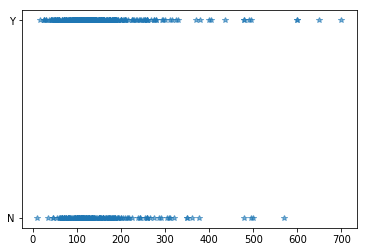

In [274]:
train = pd.read_csv('train_loan.csv')
plt.plot(train.LoanAmount, train.Loan_Status, '*', alpha=.6)

In [275]:
combined.LoanAmount.fillna(combined.LoanAmount.median(), inplace=True)

In [276]:
combined.Loan_Amount_Term.mode()

0    360.0
dtype: float64

In [277]:
combined.Loan_Amount_Term.fillna(360, inplace=True)

In [278]:
combined.Credit_History.fillna(combined.Credit_History.median(), inplace=True)

In [279]:
combined.Married.mode()

0    Yes
dtype: object

In [280]:
combined.Married.fillna('Yes', inplace=True)

#### No Missing Values 

In [281]:
combined.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [282]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [283]:
gender_dummies = pd.get_dummies(combined['Gender'], prefix='Gender')

In [284]:
married_dummies = pd.get_dummies(combined['Married'], prefix='Married')

In [285]:
dependents_dummies = pd.get_dummies(combined['Education'], prefix='Edu')

In [286]:
selfEmp_dummies = pd.get_dummies(combined['Self_Employed'], prefix='SelfEmp')

In [287]:
creditHis_dummies = pd.get_dummies(combined['Credit_History'], prefix='CreditHis')

In [288]:
propertyA_dummies = pd.get_dummies(combined['Property_Area'], prefix='PropertyA')

In [289]:
combined = pd.concat([combined, gender_dummies, married_dummies, dependents_dummies, selfEmp_dummies, creditHis_dummies, propertyA_dummies], axis=1)

In [290]:
combined.drop(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area','Education'], axis=1, inplace=True)

In [291]:
combined.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Edu_Graduate,Edu_Not Graduate,SelfEmp_No,SelfEmp_Yes,CreditHis_0.0,CreditHis_1.0,PropertyA_Rural,PropertyA_Semiurban,PropertyA_Urban
0,5849,0.0,126.0,360.0,0,1,1,0,1,0,1,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,0,1,0,1,1,0,1,0,0,1,1,0,0
2,3000,0.0,66.0,360.0,0,1,0,1,1,0,0,1,0,1,0,0,1
3,2583,2358.0,120.0,360.0,0,1,0,1,0,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,0,1,1,0,1,0,1,0,0,1,0,0,1


In [292]:
combined.shape

(981, 17)

## Modeling

In [293]:
from sklearn.linear_model import LogisticRegression

In [294]:
df =  pd.read_csv('train_loan.csv')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})                  

In [295]:
target = df['Loan_Status']

In [296]:
#recovering train and test data's
train =  combined[:614]
test = combined[614:]

In [297]:
logreg = LogisticRegression()
logreg.fit(train, target)
logreg.score(train, target)

0.8110749185667753

In [298]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

In [299]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

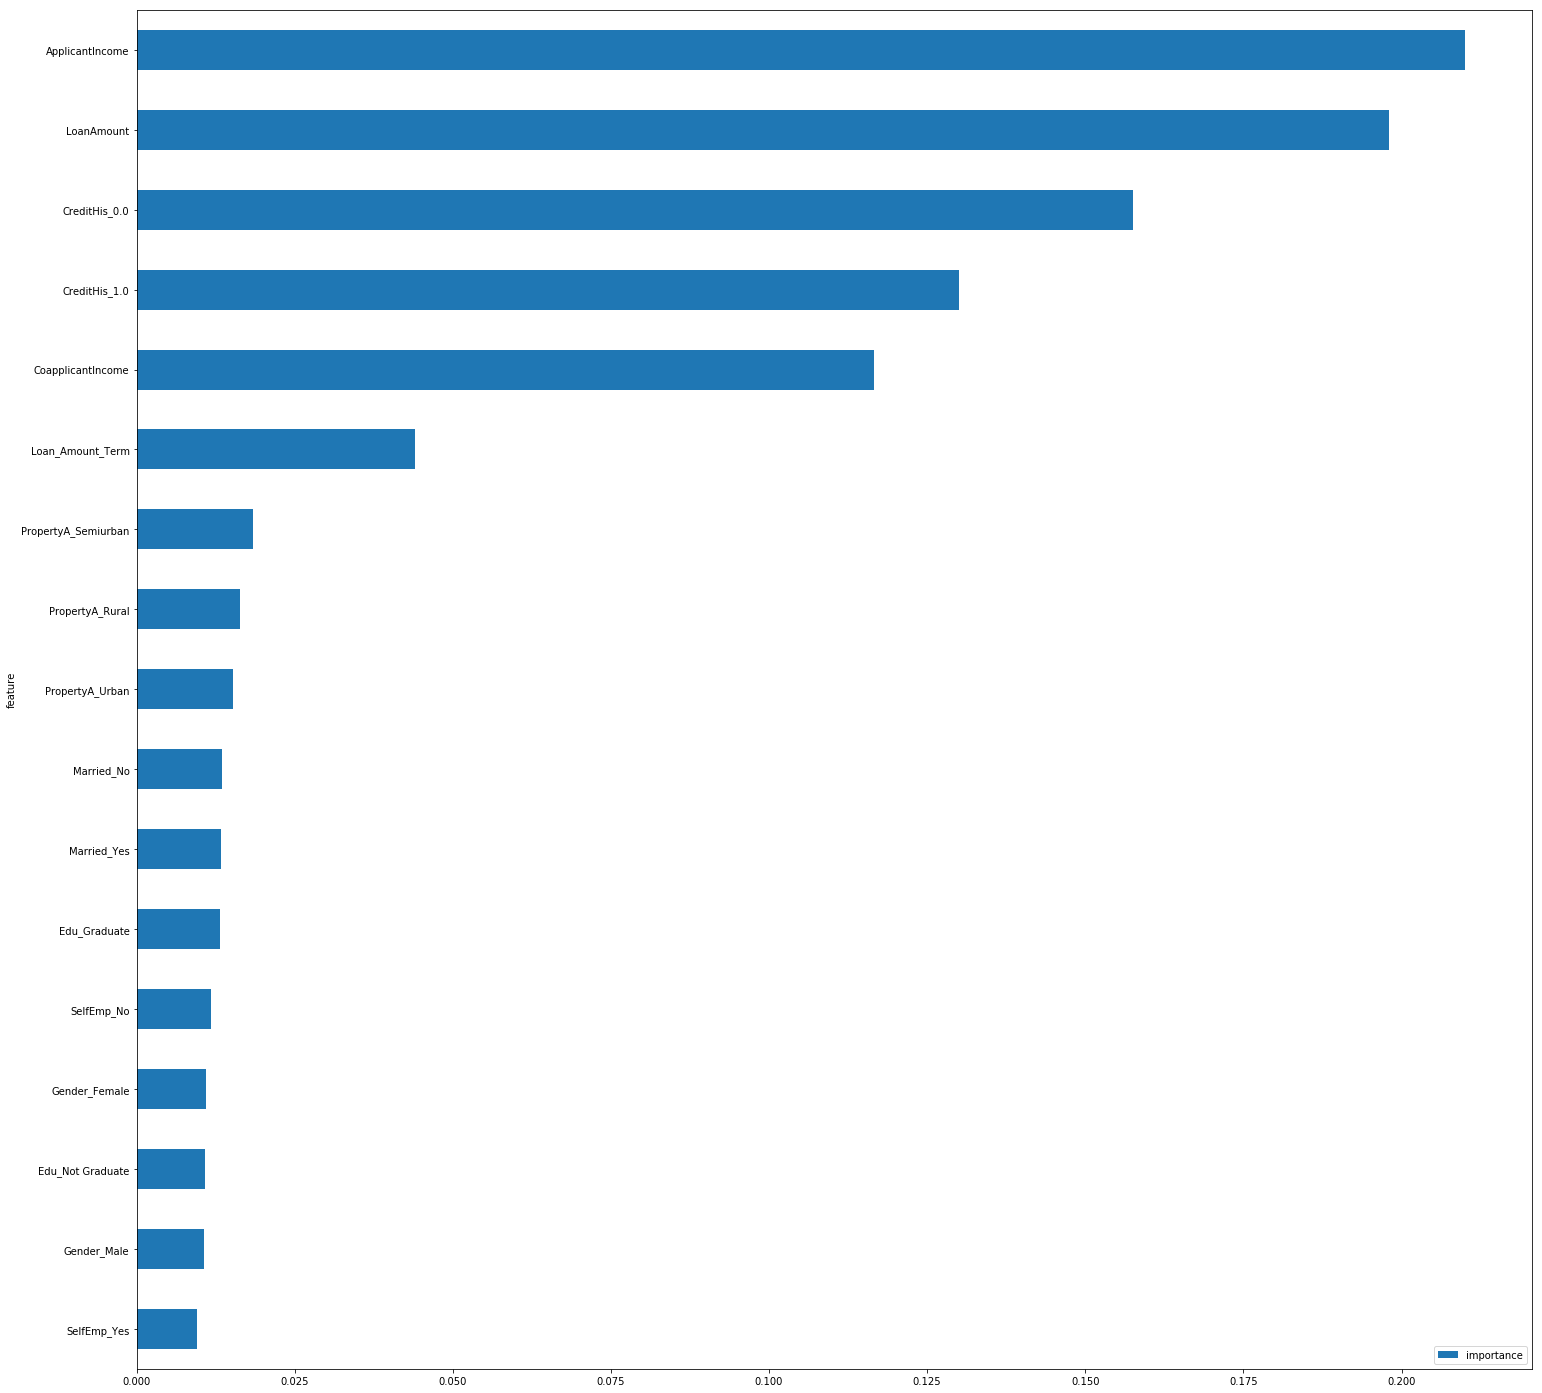

In [300]:
features.plot(kind='barh', figsize=(25, 25))

In [301]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

(614, 5)


In [302]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(367, 5)


In [303]:
logreg.fit(train_reduced , target)
logreg.score(train_reduced, target)

0.8127035830618893

In [304]:
clf.score(train, target)

1.0

In [368]:
clf1 = RandomForestClassifier(n_estimators=50, max_features='sqrt')
predictions = logreg.predict(test_reduced)


In [350]:
test1= pd.read_csv('test_loan.csv')
result = pd.DataFrame(test1, columns=['Loan_ID'])

In [351]:
result['Loan_Status'] = predictions 

In [352]:
result.shape

(367, 2)

In [353]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [354]:
result['Loan_Status'] = result['Loan_Status'].map({1:'Y', 0:'N'})                 

In [355]:
type(result)

pandas.core.frame.DataFrame

In [356]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [357]:
result.to_csv('LoanSt.csv', index=False)

In [358]:
type(result)

pandas.core.frame.DataFrame

In [359]:
tell = pd.read_csv('LoanSt.csv')

In [360]:
tell.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [362]:
tell.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [363]:
tell['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64